<a href="https://colab.research.google.com/github/shariq101/NLP-Shakespearean_word_Gen/blob/main/Experimentation_with_Network_Architecture_for_Text_Classification_problem_glove.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups

newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')


In [ ]:
from keras.preprocessing.text import Tokenizer

MAX_NB_WORDS = 20000

# get the raw text data
texts_train = newsgroups_train["data"]
texts_test = newsgroups_test["data"]

# finally, vectorize the text samples into a 2D integer tensor
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, char_level=False)
tokenizer.fit_on_texts(texts_train)
sequences = tokenizer.texts_to_sequences(texts_train)
sequences_test = tokenizer.texts_to_sequences(texts_test)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))


Found 134142 unique tokens.


In [ ]:
sequences[0]

[14,
 4308,
 1350,
 15,
 11126,
 38,
 250,
 29,
 42,
 298,
 9,
 17,
 95,
 78,
 91,
 4308,
 1350,
 15,
 34,
 77,
 3,
 2952,
 610,
 1767,
 32,
 211,
 8,
 26,
 1308,
 27,
 171,
 66,
 47,
 123,
 9879,
 63,
 16,
 17,
 298,
 8,
 708,
 1,
 86,
 263,
 11,
 26,
 4,
 36,
 1497,
 2266,
 298,
 1162,
 2,
 18,
 14,
 1,
 1347,
 13637,
 843,
 15448,
 11,
 26,
 337,
 4,
 1,
 4017,
 80,
 182,
 484,
 7,
 1376,
 1,
 844,
 8164,
 26,
 1835,
 14,
 1,
 816,
 3,
 1,
 726,
 17,
 9,
 44,
 8,
 88,
 27,
 171,
 39,
 4,
 828,
 273,
 1078,
 2908,
 198,
 3,
 2804,
 153,
 17,
 298,
 9,
 239,
 628,
 25,
 808,
 357,
 13,
 21,
 16,
 17,
 384,
 298,
 181,
 112,
 188,
 206,
 1498,
 1341,
 2,
 13,
 35,
 58,
 7860]

In [ ]:
type(tokenizer.word_index), len(tokenizer.word_index)

(dict, 134142)

In [ ]:
index_to_word = dict((i, w) for w, i in tokenizer.word_index.items())

" ".join([index_to_word[i] for i in sequences[0]])


"from wam umd edu where's my thing subject what car is this nntp posting host wam umd edu organization university of maryland college park lines 15 i was wondering if anyone out there could enlighten me on this car i saw the other day it was a 2 door sports car looked to be from the late 60s early 70s it was called a the doors were really small in addition the front bumper was separate from the rest of the body this is all i know if anyone can a model name engine specs years of production where this car is made history or whatever info you have on this looking car please e mail thanks il brought to you by your neighborhood"

average length: 302.5
max length: 15365


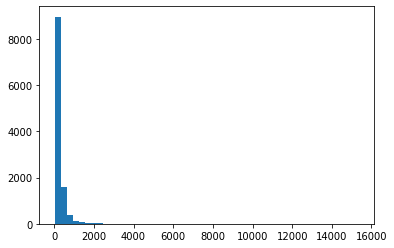

In [ ]:

seq_lens = [len(s) for s in sequences]
print("average length: %0.1f" % np.mean(seq_lens))
print("max length: %d" % max(seq_lens))

%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(seq_lens, bins=50);

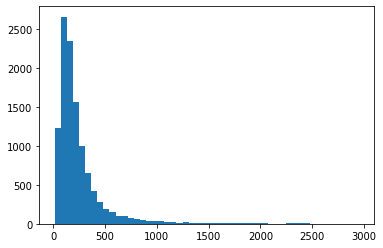

In [ ]:
plt.hist([l for l in seq_lens if l < 3000], bins=50);

In [ ]:
from keras_preprocessing.sequence import pad_sequences


MAX_SEQUENCE_LENGTH = 1000

# pad sequences with 0s
x_train = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(sequences_test, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', x_train.shape)
print('Shape of data test tensor:', x_test.shape)

Shape of data tensor: (11314, 1000)
Shape of data test tensor: (7532, 1000)


In [ ]:
from keras.utils.np_utils import to_categorical
y_train = newsgroups_train["target"]
y_test = newsgroups_test["target"]

y_train = to_categorical(np.asarray(y_train))
print('Shape of label tensor:', y_train.shape)

Shape of label tensor: (11314, 20)



1.   Build an embedding layer mapping each word to a vector representation
2.   Compute the vector representation of all words in each sequence and average them
3. Add a dense layer to output 20 classes (+ softmax)

In [ ]:
from keras.layers import Dense, Input, Flatten, Embedding
from keras.models import Sequential

EMBEDDING_DIM = 100
N_CLASSES = 20

# input: a sequence of MAX_SEQUENCE_LENGTH integers

model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM,
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=True));
model.add(Flatten());   
model.add(Dense(64, activation='relu')); 
model.add(Dense(N_CLASSES, activation='softmax'));       
model.summary()               


model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['acc'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 100)         2000000   
                                                                 
 flatten (Flatten)           (None, 100000)            0         
                                                                 
 dense (Dense)               (None, 64)                6400064   
                                                                 
 dense_1 (Dense)             (None, 20)                1300      
                                                                 
Total params: 8,401,364
Trainable params: 8,401,364
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.evaluate(x_train,y_train)

354/354 [==============================] - 4s 3ms/step - loss: 2.9967 - acc: 0.0439


[2.9967002868652344, 0.0439278781414032]

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['acc'])

In [ ]:
history=model.fit(x_train, y_train, validation_split=0.1,
          epochs=120, batch_size=128)

Epoch 1/120
80/80 [==============================] - 1s 11ms/step - loss: 2.9596 - acc: 0.0740 - val_loss: 2.8266 - val_acc: 0.0963
Epoch 2/120
80/80 [==============================] - 1s 9ms/step - loss: 2.0513 - acc: 0.3904 - val_loss: 1.4566 - val_acc: 0.5645
Epoch 3/120
80/80 [==============================] - 1s 9ms/step - loss: 0.5156 - acc: 0.8934 - val_loss: 0.9772 - val_acc: 0.7094
Epoch 4/120
80/80 [==============================] - 1s 9ms/step - loss: 0.1009 - acc: 0.9917 - val_loss: 0.8832 - val_acc: 0.7394
Epoch 5/120
80/80 [==============================] - 1s 9ms/step - loss: 0.0352 - acc: 0.9991 - val_loss: 0.8694 - val_acc: 0.7288
Epoch 6/120
80/80 [==============================] - 1s 9ms/step - loss: 0.0191 - acc: 0.9994 - val_loss: 0.8540 - val_acc: 0.7429
Epoch 7/120
80/80 [==============================] - 1s 9ms/step - loss: 0.0116 - acc: 0.9995 - val_loss: 0.8479 - val_acc: 0.7385
Epoch 8/120
80/80 [==============================] - 1s 8ms/step - loss: 0.0080 - 

In [ ]:
output_test = model.predict(x_test)
test_casses = np.argmax(output_test, axis=-1)
print("test accuracy:", np.mean(test_casses == y_test))


236/236 [==============================] - 0s 2ms/step
test accuracy: 0.6849442379182156


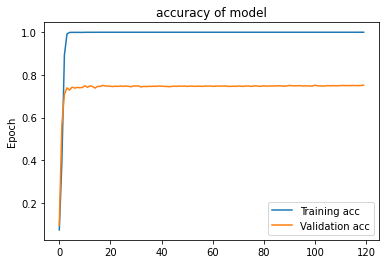

In [ ]:
plt.plot(history.history['acc'], label="Training acc")
plt.plot(history.history['val_acc'], label ="Validation acc")
plt.title("accuracy of model")
plt.ylabel("Accuracy")
plt.ylabel("Epoch")
plt.legend()
plt.show()

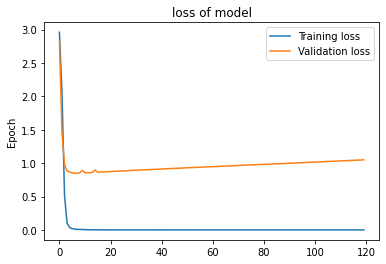

In [ ]:
plt.plot(history.history['loss'], label="Training loss")
plt.plot(history.history['val_loss'], label ="Validation loss")
plt.title("loss of model")
plt.ylabel("Loss")
plt.ylabel("Epoch")
plt.legend()
plt.show()

In [ ]:
from keras.layers import Dropout
EMBEDDING_DIM = 100
N_CLASSES = 20

# input: a sequence of MAX_SEQUENCE_LENGTH integers

model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM,
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=True));
model.add(Flatten());   
model.add(Dense(64, activation='relu')); 
model.add(Dropout(0.4));
model.add(Dense(N_CLASSES, activation='softmax'));       
model.summary()               


model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['acc'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1000, 100)         2000000   
                                                                 
 flatten_1 (Flatten)         (None, 100000)            0         
                                                                 
 dense_2 (Dense)             (None, 64)                6400064   
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 20)                1300      
                                                                 
Total params: 8,401,364
Trainable params: 8,401,364
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.evaluate(x_train,y_train)

354/354 [==============================] - 1s 3ms/step - loss: 2.9960 - acc: 0.0535


[2.996047258377075, 0.0534735731780529]

In [ ]:
history=model.fit(x_train, y_train, validation_split=0.1,
          epochs=120, batch_size=128)

Epoch 1/120
80/80 [==============================] - 1s 10ms/step - loss: 3.0066 - acc: 0.0560 - val_loss: 2.9554 - val_acc: 0.0786
Epoch 2/120
80/80 [==============================] - 1s 9ms/step - loss: 2.8680 - acc: 0.1002 - val_loss: 2.8267 - val_acc: 0.1422
Epoch 3/120
80/80 [==============================] - 1s 9ms/step - loss: 2.3422 - acc: 0.2787 - val_loss: 1.6869 - val_acc: 0.5459
Epoch 4/120
80/80 [==============================] - 1s 8ms/step - loss: 0.8970 - acc: 0.7607 - val_loss: 1.0347 - val_acc: 0.7138
Epoch 5/120
80/80 [==============================] - 1s 9ms/step - loss: 0.2790 - acc: 0.9460 - val_loss: 0.8224 - val_acc: 0.7535
Epoch 6/120
80/80 [==============================] - 1s 9ms/step - loss: 0.1213 - acc: 0.9834 - val_loss: 0.7744 - val_acc: 0.7641
Epoch 7/120
80/80 [==============================] - 1s 9ms/step - loss: 0.0703 - acc: 0.9923 - val_loss: 0.7679 - val_acc: 0.7650
Epoch 8/120
80/80 [==============================] - 1s 8ms/step - loss: 0.0496 - 

In [ ]:
output_test = model.predict(x_test)
test_casses = np.argmax(output_test, axis=-1)
print("test accuracy:", np.mean(test_casses == y_test))


236/236 [==============================] - 0s 1ms/step
test accuracy: 0.6789697291556027


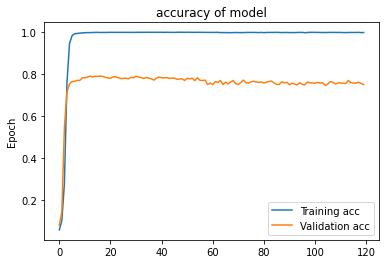

In [ ]:
plt.plot(history.history['acc'], label="Training acc")
plt.plot(history.history['val_acc'], label ="Validation acc")
plt.title("accuracy of model")
plt.ylabel("Accuracy")
plt.ylabel("Epoch")
plt.legend()
plt.show()

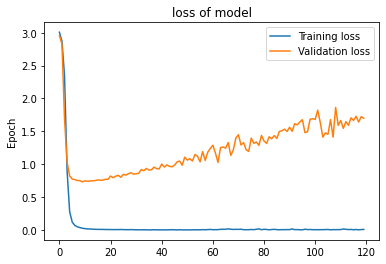

In [ ]:
plt.plot(history.history['loss'], label="Training loss")
plt.plot(history.history['val_loss'], label ="Validation loss")
plt.title("loss of model")
plt.ylabel("Loss")
plt.ylabel("Epoch")
plt.legend()
plt.show()

In [ ]:
from keras.layers import Dense, Input, Flatten, Embedding
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint

EMBEDDING_DIM = 100
N_CLASSES = 20

# input: a sequence of MAX_SEQUENCE_LENGTH integers

model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM,
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=True));
model.add(Flatten());   
model.add(Dense(64, activation='relu')); 
model.add(Dense(N_CLASSES, activation='softmax'));       
model.summary()               


model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['acc'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 1000, 100)         2000000   
                                                                 
 flatten_2 (Flatten)         (None, 100000)            0         
                                                                 
 dense_4 (Dense)             (None, 64)                6400064   
                                                                 
 dense_5 (Dense)             (None, 20)                1300      
                                                                 
Total params: 8,401,364
Trainable params: 8,401,364
Non-trainable params: 0
_________________________________________________________________


In [ ]:
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint(filepath='pred', monitor='val_loss', save_best_only=True)]

print(callbacks)

[<keras.callbacks.EarlyStopping object at 0x7fdf4dc01dc0>, <keras.callbacks.ModelCheckpoint object at 0x7fdf4dc01f70>]


In [ ]:
history=model.fit(x_train, y_train, validation_split=0.1,
          epochs=120, batch_size=128, callbacks=callbacks)

Epoch 1/120
80/80 [==============================] - 2s 21ms/step - loss: 2.9684 - acc: 0.0716 - val_loss: 2.8465 - val_acc: 0.0998
Epoch 2/120
80/80 [==============================] - 1s 18ms/step - loss: 2.1579 - acc: 0.3374 - val_loss: 1.5230 - val_acc: 0.5159
Epoch 3/120
80/80 [==============================] - 1s 18ms/step - loss: 0.5894 - acc: 0.8705 - val_loss: 0.9890 - val_acc: 0.7085
Epoch 4/120
80/80 [==============================] - 2s 20ms/step - loss: 0.1146 - acc: 0.9901 - val_loss: 0.8753 - val_acc: 0.7376
Epoch 5/120
80/80 [==============================] - 1s 17ms/step - loss: 0.0385 - acc: 0.9989 - val_loss: 0.8399 - val_acc: 0.7420
Epoch 6/120
80/80 [==============================] - 1s 18ms/step - loss: 0.0195 - acc: 0.9995 - val_loss: 0.8286 - val_acc: 0.7509
Epoch 7/120
80/80 [==============================] - 1s 9ms/step - loss: 0.0134 - acc: 0.9993 - val_loss: 0.8325 - val_acc: 0.7456
Epoch 8/120
80/80 [==============================] - 1s 9ms/step - loss: 0.00

In [ ]:
output_test = model.predict(x_test)
test_casses = np.argmax(output_test, axis=-1)
print("test accuracy:", np.mean(test_casses == y_test))

236/236 [==============================] - 0s 2ms/step
test accuracy: 0.6647636749867233


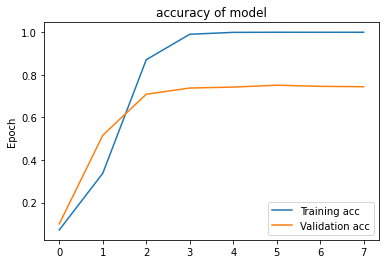

In [ ]:
plt.plot(history.history['acc'], label="Training acc")
plt.plot(history.history['val_acc'], label ="Validation acc")
plt.title("accuracy of model")
plt.ylabel("Accuracy")
plt.ylabel("Epoch")
plt.legend()
plt.show()

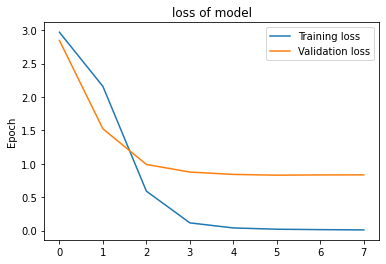

In [ ]:
plt.plot(history.history['loss'], label="Training loss")
plt.plot(history.history['val_loss'], label ="Validation loss")
plt.title("loss of model")
plt.ylabel("Loss")
plt.ylabel("Epoch")
plt.legend()
plt.show()

In [ ]:
from keras.layers import LSTM
EMBEDDING_DIM = 100
N_CLASSES = 20

# input: a sequence of MAX_SEQUENCE_LENGTH integers

model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM,
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=True));
model.add(LSTM(64))                             
model.add(Dense(64, activation='relu')); 
model.add(Dropout(0.4));
model.add(Dense(N_CLASSES, activation='softmax'));       
model.summary()               


model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['acc'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 1000, 100)         2000000   
                                                                 
 lstm (LSTM)                 (None, 64)                42240     
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 20)                1300      
                                                                 
Total params: 2,047,700
Trainable params: 2,047,700
Non-trainable params: 0
_________________________________________________________________


In [ ]:
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint(filepath='pred', monitor='val_loss', save_best_only=True)]

print(callbacks)

[<keras.callbacks.EarlyStopping object at 0x7fdf40095cd0>, <keras.callbacks.ModelCheckpoint object at 0x7fdf40095a30>]


In [ ]:
history=model.fit(x_train, y_train, validation_split=0.1,
          epochs=120, batch_size=128, callbacks=callbacks)

Epoch 1/120
79/80 [============================>.] - ETA: 0s - loss: 2.9427 - acc: 0.1006

80/80 [==============================] - 13s 116ms/step - loss: 2.9410 - acc: 0.1015 - val_loss: 2.7268 - val_acc: 0.1493
Epoch 2/120
80/80 [==============================] - ETA: 0s - loss: 2.4298 - acc: 0.2128

80/80 [==============================] - 9s 116ms/step - loss: 2.4298 - acc: 0.2128 - val_loss: 2.2807 - val_acc: 0.2968
Epoch 3/120
79/80 [============================>.] - ETA: 0s - loss: 1.8393 - acc: 0.4002

80/80 [==============================] - 9s 110ms/step - loss: 1.8358 - acc: 0.4015 - val_loss: 1.7401 - val_acc: 0.4267
Epoch 4/120
79/80 [============================>.] - ETA: 0s - loss: 1.2187 - acc: 0.5890

80/80 [==============================] - 8s 106ms/step - loss: 1.2179 - acc: 0.5894 - val_loss: 1.5000 - val_acc: 0.5239
Epoch 5/120
79/80 [============================>.] - ETA: 0s - loss: 0.8580 - acc: 0.7090

80/80 [==============================] - 9s 111ms/step - loss: 0.8573 - acc: 0.7092 - val_loss: 1.2761 - val_acc: 0.6272
Epoch 6/120
80/80 [==============================] - 5s 58ms/step - loss: 0.6529 - acc: 0.7903 - val_loss: 1.3220 - val_acc: 0.6290
Epoch 7/120
80/80 [==============================] - 5s 57ms/step - loss: 0.4310 - acc: 0.8679 - val_loss: 1.3210 - val_acc: 0.6652


In [ ]:
output_test = model.predict(x_test)
test_casses = np.argmax(output_test, axis=-1)
print("test accuracy:", np.mean(test_casses == y_test))

236/236 [==============================] - 4s 17ms/step
test accuracy: 0.5735528412108338


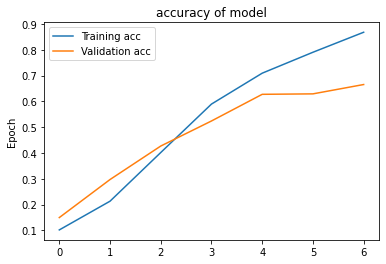

In [ ]:
plt.plot(history.history['acc'], label="Training acc")
plt.plot(history.history['val_acc'], label ="Validation acc")
plt.title("accuracy of model")
plt.ylabel("Accuracy")
plt.ylabel("Epoch")
plt.legend()
plt.show()

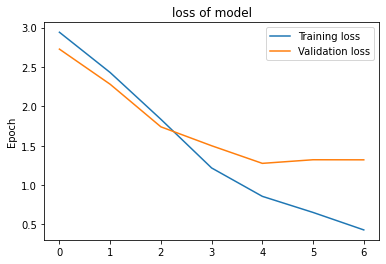

In [ ]:
plt.plot(history.history['loss'], label="Training loss")
plt.plot(history.history['val_loss'], label ="Validation loss")
plt.title("loss of model")
plt.ylabel("Loss")
plt.ylabel("Epoch")
plt.legend()
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving glove.6B.50d.txt to glove.6B.50d.txt


In [ ]:
embeddings_index = {}
embeddings_vectors = []
f = open('glove.6B.50d.txt', 'rb')

word_idx = 0
for line in f:
    values = line.decode('utf-8').split()
    word = values[0]
    vector = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = word_idx
    embeddings_vectors.append(vector)
    word_idx = word_idx + 1
f.close()

inv_index = {v: k for k, v in embeddings_index.items()}
print("found %d different words in the file" % word_idx)

found 400000 different words in the file


In [ ]:
# Stack all embeddings in a large numpy array
glove_embeddings = np.vstack(embeddings_vectors)
glove_norms = np.linalg.norm(glove_embeddings, axis=-1, keepdims=True)
glove_embeddings_normed = glove_embeddings / glove_norms
print(glove_embeddings.shape)

(400000, 50)


In [ ]:
def get_emb(word):
    idx = embeddings_index.get(word)
    if idx is None:
        return None
    else:
        return glove_embeddings[idx]

    
def get_normed_emb(word):
    idx = embeddings_index.get(word)
    if idx is None:
        return None
    else:
        return glove_embeddings_normed[idx]

In [ ]:
EMBEDDING_DIM = 50

# prepare embedding matrix
nb_words_in_matrix = 0
nb_words = min(MAX_NB_WORDS, len(word_index))
embedding_matrix = np.zeros((nb_words, EMBEDDING_DIM))
for word, i in word_index.items():
    if i >= MAX_NB_WORDS:
        continue
    embedding_vector = get_emb(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
        nb_words_in_matrix = nb_words_in_matrix + 1
        
print("added %d words in the embedding matrix" % nb_words_in_matrix)

added 17401 words in the embedding matrix


In [ ]:
pretrained_embedding_layer = Embedding(
    MAX_NB_WORDS, 50,
    weights=[embedding_matrix],
    input_length=MAX_SEQUENCE_LENGTH,
)

In [ ]:
model = Sequential()
model.add(pretrained_embedding_layer);
model.add(Flatten());   
model.add(Dense(64, activation='relu')); 
####model.add(Dropout(0.4));
model.add(Dense(N_CLASSES, activation='softmax'));       
model.summary()  


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 1000, 50)          1000000   
                                                                 
 flatten_3 (Flatten)         (None, 50000)             0         
                                                                 
 dense_10 (Dense)            (None, 64)                3200064   
                                                                 
 dense_11 (Dense)            (None, 20)                1300      
                                                                 
Total params: 4,201,364
Trainable params: 4,201,364
Non-trainable params: 0
_________________________________________________________________


In [ ]:
callbacks = [EarlyStopping(monitor='val_loss', patience=10),
             ModelCheckpoint(filepath='pred', monitor='val_loss', save_best_only=True)]

print(callbacks)

[<keras.callbacks.EarlyStopping object at 0x7fdee03aa910>, <keras.callbacks.ModelCheckpoint object at 0x7fdee03aaee0>]


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['acc'])

In [ ]:
history=model.fit(x_train, y_train, validation_split=0.1,
          epochs=120, batch_size=128, callbacks=callbacks)

Epoch 1/120
80/80 [==============================] - 2s 16ms/step - loss: 0.0192 - acc: 0.9977 - val_loss: 2.3275 - val_acc: 0.5424
Epoch 2/120
80/80 [==============================] - 1s 14ms/step - loss: 0.0122 - acc: 0.9982 - val_loss: 2.2428 - val_acc: 0.5459
Epoch 3/120
80/80 [==============================] - 1s 7ms/step - loss: 0.0182 - acc: 0.9970 - val_loss: 2.4722 - val_acc: 0.5141
Epoch 4/120
80/80 [==============================] - 1s 14ms/step - loss: 0.0122 - acc: 0.9983 - val_loss: 2.1891 - val_acc: 0.5442
Epoch 5/120
80/80 [==============================] - 0s 6ms/step - loss: 0.0057 - acc: 0.9996 - val_loss: 2.3043 - val_acc: 0.5495
Epoch 6/120
80/80 [==============================] - 1s 14ms/step - loss: 0.0055 - acc: 0.9996 - val_loss: 2.1106 - val_acc: 0.5742
Epoch 7/120
80/80 [==============================] - 1s 7ms/step - loss: 0.0058 - acc: 0.9997 - val_loss: 2.2408 - val_acc: 0.5477
Epoch 8/120
80/80 [==============================] - 1s 6ms/step - loss: 0.0090

In [ ]:
output_test = model.predict(x_test)
test_casses = np.argmax(output_test, axis=-1)
print("test accuracy:", np.mean(test_casses == y_test))

236/236 [==============================] - 0s 2ms/step
test accuracy: 0.47729686670207117


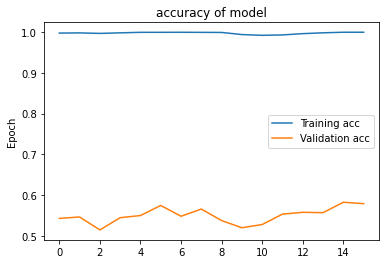

In [ ]:
plt.plot(history.history['acc'], label="Training acc")
plt.plot(history.history['val_acc'], label ="Validation acc")
plt.title("accuracy of model")
plt.ylabel("Accuracy")
plt.ylabel("Epoch")
plt.legend()
plt.show()

In [ ]:
model = Sequential()
model.add(pretrained_embedding_layer);
model.add(Flatten());   
model.add(Dense(64, activation='relu')); 
model.add(Dropout(0.4));
model.add(Dense(N_CLASSES, activation='softmax'));       
model.summary()  

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 1000, 50)          1000000   
                                                                 
 flatten_5 (Flatten)         (None, 50000)             0         
                                                                 
 dense_14 (Dense)            (None, 64)                3200064   
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_15 (Dense)            (None, 20)                1300      
                                                                 
Total params: 4,201,364
Trainable params: 4,201,364
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['acc'])

In [ ]:
history=model.fit(x_train, y_train, validation_split=0.1,
          epochs=120, batch_size=128)

Epoch 1/120
80/80 [==============================] - 1s 10ms/step - loss: 2.6732 - acc: 0.1736 - val_loss: 2.0908 - val_acc: 0.3790
Epoch 2/120
80/80 [==============================] - 1s 7ms/step - loss: 1.6830 - acc: 0.4690 - val_loss: 1.5119 - val_acc: 0.5336
Epoch 3/120
80/80 [==============================] - 1s 6ms/step - loss: 1.0813 - acc: 0.6548 - val_loss: 1.4020 - val_acc: 0.5477
Epoch 4/120
80/80 [==============================] - 1s 6ms/step - loss: 0.7515 - acc: 0.7622 - val_loss: 1.2106 - val_acc: 0.6087
Epoch 5/120
80/80 [==============================] - 1s 6ms/step - loss: 0.5130 - acc: 0.8430 - val_loss: 1.1897 - val_acc: 0.6272
Epoch 6/120
80/80 [==============================] - 1s 6ms/step - loss: 0.4067 - acc: 0.8731 - val_loss: 1.2169 - val_acc: 0.6352
Epoch 7/120
80/80 [==============================] - 1s 6ms/step - loss: 0.3260 - acc: 0.8986 - val_loss: 1.2234 - val_acc: 0.6387
Epoch 8/120
80/80 [==============================] - 0s 6ms/step - loss: 0.2688 - 

In [ ]:
output_test = model.predict(x_test)
test_casses = np.argmax(output_test, axis=-1)
print("test accuracy:", np.mean(test_casses == y_test))

236/236 [==============================] - 1s 4ms/step
test accuracy: 0.6344928305894849


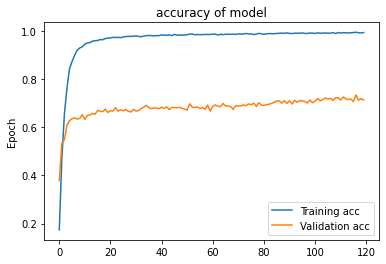

In [ ]:
plt.plot(history.history['acc'], label="Training acc")
plt.plot(history.history['val_acc'], label ="Validation acc")
plt.title("accuracy of model")
plt.ylabel("Accuracy")
plt.ylabel("Epoch")
plt.legend()
plt.show()

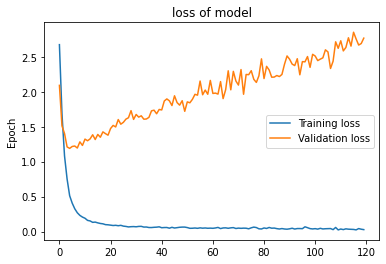

In [ ]:
plt.plot(history.history['loss'], label="Training loss")
plt.plot(history.history['val_loss'], label ="Validation loss")
plt.title("loss of model")
plt.ylabel("Loss")
plt.ylabel("Epoch")
plt.legend()
plt.show()

In [ ]:
model = Sequential()
model.add(pretrained_embedding_layer);
model.add(Flatten()); 
model.add(Dropout(0.4));  
model.add(Dense(64, activation='relu')); 
model.add(Dropout(0.4));
model.add(Dense(N_CLASSES, activation='softmax'));       
model.summary() 

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 1000, 50)          1000000   
                                                                 
 flatten_6 (Flatten)         (None, 50000)             0         
                                                                 
 dropout_3 (Dropout)         (None, 50000)             0         
                                                                 
 dense_16 (Dense)            (None, 64)                3200064   
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_17 (Dense)            (None, 20)                1300      
                                                                 
Total params: 4,201,364
Trainable params: 4,201,364
No

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['acc'])

In [ ]:
history=model.fit(x_train, y_train, validation_split=0.1,
          epochs=120, batch_size=128, callbacks=callbacks)

Epoch 1/120
80/80 [==============================] - 2s 20ms/step - loss: 1.7737 - acc: 0.4640 - val_loss: 0.9654 - val_acc: 0.7270
Epoch 2/120
80/80 [==============================] - 1s 17ms/step - loss: 0.5341 - acc: 0.8431 - val_loss: 0.8188 - val_acc: 0.7491
Epoch 3/120
80/80 [==============================] - 1s 18ms/step - loss: 0.2881 - acc: 0.9197 - val_loss: 0.7794 - val_acc: 0.7527
Epoch 4/120
80/80 [==============================] - 1s 8ms/step - loss: 0.1947 - acc: 0.9465 - val_loss: 0.7907 - val_acc: 0.7553
Epoch 5/120
80/80 [==============================] - 1s 8ms/step - loss: 0.1493 - acc: 0.9586 - val_loss: 0.8044 - val_acc: 0.7580
Epoch 6/120
80/80 [==============================] - 1s 8ms/step - loss: 0.1234 - acc: 0.9660 - val_loss: 0.8041 - val_acc: 0.7588
Epoch 7/120
80/80 [==============================] - 1s 8ms/step - loss: 0.1042 - acc: 0.9733 - val_loss: 0.8498 - val_acc: 0.7509
Epoch 8/120
80/80 [==============================] - 1s 8ms/step - loss: 0.0840 

In [ ]:
output_test = model.predict(x_test)
test_casses = np.argmax(output_test, axis=-1)
print("test accuracy:", np.mean(test_casses == y_test))

236/236 [==============================] - 0s 2ms/step
test accuracy: 0.694105151354222


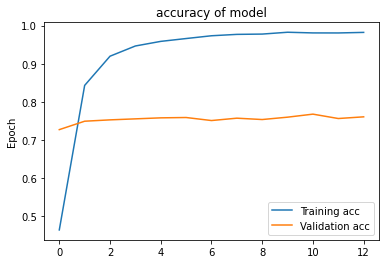

In [ ]:
plt.plot(history.history['acc'], label="Training acc")
plt.plot(history.history['val_acc'], label ="Validation acc")
plt.title("accuracy of model")
plt.ylabel("Accuracy")
plt.ylabel("Epoch")
plt.legend()
plt.show()

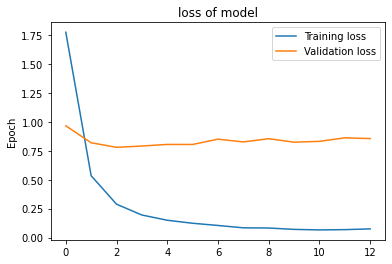

In [ ]:
plt.plot(history.history['loss'], label="Training loss")
plt.plot(history.history['val_loss'], label ="Validation loss")
plt.title("loss of model")
plt.ylabel("Loss")
plt.ylabel("Epoch")
plt.legend()
plt.show()

Trainable embedding layer

In [ ]:
model = Sequential()
model.add(pretrained_embedding_layer);
model.add(Flatten()); 
model.add(Dropout(0.4));  
model.add(Dense(64, activation='relu')); 
model.add(Dropout(0.4));
model.add(Dense(N_CLASSES, activation='softmax'));       
model.summary() 


model.layers[1].trainable=True


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 1000, 50)          1000000   
                                                                 
 flatten_7 (Flatten)         (None, 50000)             0         
                                                                 
 dropout_5 (Dropout)         (None, 50000)             0         
                                                                 
 dense_18 (Dense)            (None, 64)                3200064   
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_19 (Dense)            (None, 20)                1300      
                                                                 
Total params: 4,201,364
Trainable params: 4,201,364
No

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['acc'])

In [ ]:
history=model.fit(x_train, y_train, validation_split=0.1,
          epochs=120, batch_size=128, callbacks=callbacks)

Epoch 1/120
80/80 [==============================] - 1s 10ms/step - loss: 1.6056 - acc: 0.5186 - val_loss: 0.9029 - val_acc: 0.7323
Epoch 2/120
80/80 [==============================] - 1s 18ms/step - loss: 0.4127 - acc: 0.8835 - val_loss: 0.7754 - val_acc: 0.7527
Epoch 3/120
80/80 [==============================] - 1s 8ms/step - loss: 0.2301 - acc: 0.9382 - val_loss: 0.7789 - val_acc: 0.7668
Epoch 4/120
80/80 [==============================] - 1s 8ms/step - loss: 0.1608 - acc: 0.9573 - val_loss: 0.7781 - val_acc: 0.7615
Epoch 5/120
80/80 [==============================] - 1s 8ms/step - loss: 0.1144 - acc: 0.9708 - val_loss: 0.8056 - val_acc: 0.7694
Epoch 6/120
80/80 [==============================] - 1s 8ms/step - loss: 0.1029 - acc: 0.9736 - val_loss: 0.8171 - val_acc: 0.7650
Epoch 7/120
80/80 [==============================] - 1s 8ms/step - loss: 0.0841 - acc: 0.9795 - val_loss: 0.7938 - val_acc: 0.7756
Epoch 8/120
80/80 [==============================] - 1s 8ms/step - loss: 0.0692 -

In [ ]:
output_test = model.predict(x_test)
test_casses = np.argmax(output_test, axis=-1)
print("test accuracy:", np.mean(test_casses == y_test))

236/236 [==============================] - 0s 2ms/step
test accuracy: 0.7092405735528412


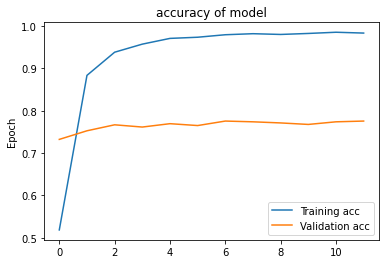

In [ ]:
plt.plot(history.history['acc'], label="Training acc")
plt.plot(history.history['val_acc'], label ="Validation acc")
plt.title("accuracy of model")
plt.ylabel("Accuracy")
plt.ylabel("Epoch")
plt.legend()
plt.show()

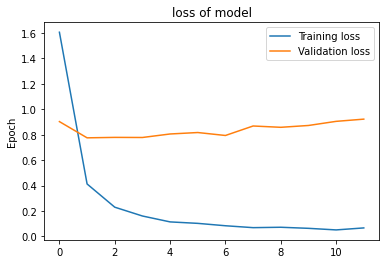

In [ ]:
plt.plot(history.history['loss'], label="Training loss")
plt.plot(history.history['val_loss'], label ="Validation loss")
plt.title("loss of model")
plt.ylabel("Loss")
plt.ylabel("Epoch")
plt.legend()
plt.show()

In [ ]:

model = Sequential()
model.add(pretrained_embedding_layer);
model.add(LSTM(64))    
model.add(Dropout(0.4));  
model.add(Dense(64, activation='relu')); 
model.add(Dropout(0.4));
model.add(Dense(N_CLASSES, activation='softmax'));       
model.summary() 


model.layers[1].trainable=True

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 1000, 50)          1000000   
                                                                 
 lstm_1 (LSTM)               (None, 64)                29440     
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_20 (Dense)            (None, 64)                4160      
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_21 (Dense)            (None, 20)                1300      
                                                                 
Total params: 1,034,900
Trainable params: 1,034,900
N

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['acc'])

In [ ]:
history=model.fit(x_train, y_train, validation_split=0.1,
          epochs=120, batch_size=128, callbacks=callbacks)

Epoch 1/120
80/80 [==============================] - 6s 60ms/step - loss: 2.8078 - acc: 0.1456 - val_loss: 2.3197 - val_acc: 0.3057
Epoch 2/120
80/80 [==============================] - 4s 54ms/step - loss: 1.9733 - acc: 0.3607 - val_loss: 1.5955 - val_acc: 0.4806
Epoch 3/120
80/80 [==============================] - 4s 53ms/step - loss: 1.5852 - acc: 0.4751 - val_loss: 1.4285 - val_acc: 0.5345
Epoch 4/120
80/80 [==============================] - 4s 53ms/step - loss: 1.4207 - acc: 0.5338 - val_loss: 1.3218 - val_acc: 0.5601
Epoch 5/120
80/80 [==============================] - 4s 54ms/step - loss: 1.2167 - acc: 0.5981 - val_loss: 1.2294 - val_acc: 0.6219
Epoch 6/120
80/80 [==============================] - 4s 52ms/step - loss: 1.0758 - acc: 0.6537 - val_loss: 1.2182 - val_acc: 0.6360
Epoch 7/120
80/80 [==============================] - 4s 56ms/step - loss: 0.9701 - acc: 0.6899 - val_loss: 1.0792 - val_acc: 0.6731
Epoch 8/120
80/80 [==============================] - 5s 64ms/step - loss: 1.

In [ ]:
output_test = model.predict(x_test)
test_casses = np.argmax(output_test, axis=-1)
print("test accuracy:", np.mean(test_casses == y_test))

236/236 [==============================] - 4s 16ms/step
test accuracy: 0.7031332979288369


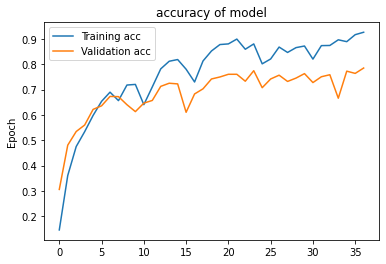

In [ ]:
plt.plot(history.history['acc'], label="Training acc")
plt.plot(history.history['val_acc'], label ="Validation acc")
plt.title("accuracy of model")
plt.ylabel("Accuracy")
plt.ylabel("Epoch")
plt.legend()
plt.show()

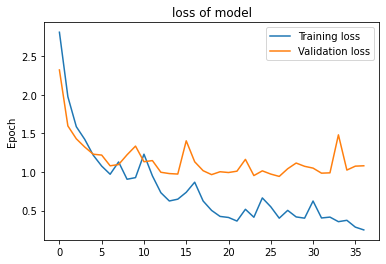

In [ ]:
plt.plot(history.history['loss'], label="Training loss")
plt.plot(history.history['val_loss'], label ="Validation loss")
plt.title("loss of model")
plt.ylabel("Loss")
plt.ylabel("Epoch")
plt.legend()
plt.show()

In [ ]:
model = Sequential()
model.add(pretrained_embedding_layer);
model.add(LSTM(64)) ## RECURRENT DROPOUT
model.add(Flatten());    
model.add(Dropout(0.4));  ##search the space for size and not to add DROPOUT after LSTM
model.add(Dense(64, activation='relu')); 
model.add(Dropout(0.4));
model.add(Dense(N_CLASSES, activation='softmax'));       
model.summary() 


model.layers[1].trainable=True

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 1000, 50)          1000000   
                                                                 
 lstm_3 (LSTM)               (None, 64)                29440     
                                                                 
 flatten_9 (Flatten)         (None, 64)                0         
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_22 (Dense)            (None, 64)                4160      
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_23 (Dense)            (None, 20)              

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['acc'])

In [ ]:
history=model.fit(x_train, y_train, validation_split=0.1,
          epochs=120, batch_size=128, callbacks=callbacks)

Epoch 1/120
80/80 [==============================] - 7s 70ms/step - loss: 2.7498 - acc: 0.1752 - val_loss: 2.2016 - val_acc: 0.3737
Epoch 2/120
80/80 [==============================] - 6s 70ms/step - loss: 1.7669 - acc: 0.4317 - val_loss: 1.4883 - val_acc: 0.5274
Epoch 3/120
80/80 [==============================] - 6s 75ms/step - loss: 1.1769 - acc: 0.6045 - val_loss: 1.2251 - val_acc: 0.6413
Epoch 4/120
80/80 [==============================] - 5s 59ms/step - loss: 1.1970 - acc: 0.6246 - val_loss: 1.2565 - val_acc: 0.6281
Epoch 5/120
80/80 [==============================] - 4s 56ms/step - loss: 0.8991 - acc: 0.7131 - val_loss: 1.2240 - val_acc: 0.6422
Epoch 6/120
80/80 [==============================] - 4s 55ms/step - loss: 0.8199 - acc: 0.7430 - val_loss: 1.1532 - val_acc: 0.6643
Epoch 7/120
80/80 [==============================] - 4s 56ms/step - loss: 0.6263 - acc: 0.8068 - val_loss: 1.0725 - val_acc: 0.7182
Epoch 8/120
80/80 [==============================] - 4s 56ms/step - loss: 0.

In [ ]:
output_test = model.predict(x_test)
test_casses = np.argmax(output_test, axis=-1)
print("test accuracy:", np.mean(test_casses == y_test))

236/236 [==============================] - 4s 15ms/step
test accuracy: 0.7100371747211895


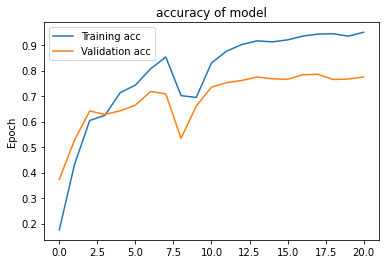

In [ ]:
plt.plot(history.history['acc'], label="Training acc")
plt.plot(history.history['val_acc'], label ="Validation acc")
plt.title("accuracy of model")
plt.ylabel("Accuracy")
plt.ylabel("Epoch")
plt.legend()
plt.show()

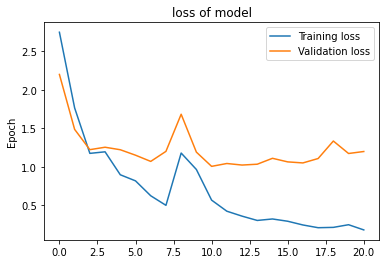

In [ ]:
plt.plot(history.history['loss'], label="Training loss")
plt.plot(history.history['val_loss'], label ="Validation loss")
plt.title("loss of model")
plt.ylabel("Loss")
plt.ylabel("Epoch")
plt.legend()
plt.show()